In [7]:
# Import libraries
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import xgboost as xgb

# Add the path to the module to the system path
module_path = os.path.join(os.getcwd(), "module_data_prep_forecast")
sys.path.append(module_path)
import data_preparation_forecasting

# Testing

In [8]:
# Call the main function to obtain the dataframes
df_list = data_preparation_forecasting.main()

In [36]:
def load_and_preprocess_data():

    # Call the main function to obtain the dataframes
    df_list = data_preparation_forecasting.main()

    # Exclude the Sales_Value column and only keep the Qty
    for i in range(len(df_list)):
        df_list[i] = df_list[i][["Sales_Qty"]]

    # Train and test split, we have 1005 observations and we will take roughly 100 days as test
    dfs_train, dfs_test = [], []

    for i in range(len(df_list)):
        test_set_size = 100
        split_index = len(df_list[i]) - test_set_size
        train_df = df_list[i].iloc[:split_index]
        test_df = df_list[i].iloc[split_index:]
        dfs_train.append(train_df)
        dfs_test.append(test_df)

    return dfs_train, dfs_test

def create_features():

    df["Year"] = df.index.year
    df["Quarter"] = df.index.quarter
    df["Month"] = df.index.month
    df["Day_of_Week"] = df.index.dayofweek

In [37]:
dfs_train, dfs_test = load_and_preprocess_data()

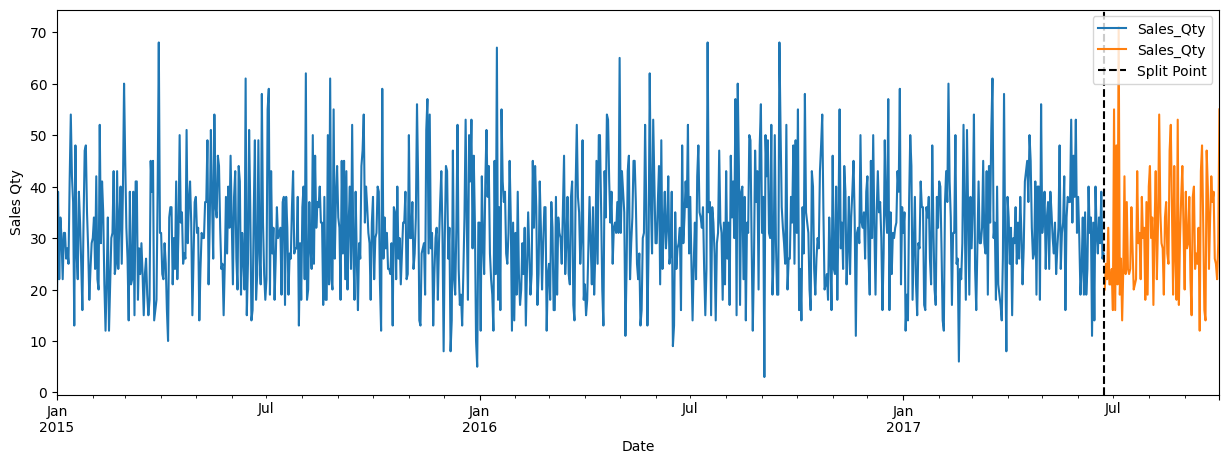

In [43]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
dfs_train[0].plot(ax=ax, label="Training Set")
dfs_test[0].plot(ax=ax, label="Test Set")
split_date = dfs_train[0].index[-1]  
ax.axvline(x=split_date, color='black', linestyle='--', label="Split Point")
ax.set_xlabel('Date')
ax.set_ylabel('Sales Qty')
ax.legend()
plt.show()

In [44]:
dfs_train[0].head(5)

,Sales_Qty
Date,
2015-01-01,16
2015-01-02,39
2015-01-03,22
2015-01-04,34
2015-01-05,30


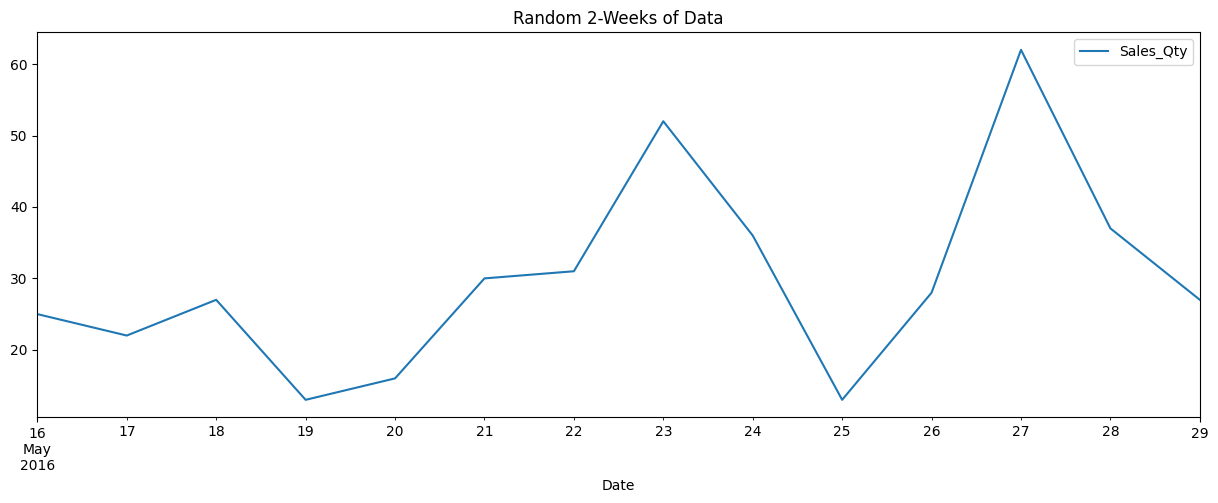

In [49]:
# How does one random week look like
dfs_train[0].loc[(dfs_train[0].index >= "2016-05-16") & (dfs_train[0].index <= "2016-05-29")].plot(figsize = (15,5), title = "Random 2-Weeks of Data")
plt.show()